In [2]:
import pandas as pd
import glob
from datetime import datetime
import calendar
import plotly.express as px
import plotly.graph_objects as go
import chart_studio.plotly as py
import plotly.io as pio
from plotly.offline import plot
pio.renderers.default = 'notebook'

Importing the Datasets

In [3]:
path = "/Cyclistic/Data/all-data/*.csv"
files = glob.glob(path)

In [4]:
# Combining all the data files by first reading each file indvidually,
# then concatinating the results to one data frame

all_data = pd.DataFrame()
for file in files:
     read_file = pd.read_csv(file)
     all_data = pd.concat([read_file,all_data])

all_data.set_index("ride_id", inplace = True)
all_data.head(10)

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
ride_id,,,,,,,,,,,,
C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,NaN,NaN,NaN,NaN,41.90,-87.63,41.89,-87.61,casual
DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,NaN,NaN,NaN,NaN,41.88,-87.62,41.79,-87.58,casual
0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,NaN,NaN,NaN,NaN,41.92,-87.70,41.92,-87.70,casual
7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,NaN,NaN,NaN,NaN,41.92,-87.70,41.94,-87.69,casual
853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,NaN,NaN,NaN,NaN,41.94,-87.69,41.94,-87.70,casual
F5E63DFD96B2A737,electric_bike,2021-05-30 11:33:41,2021-05-30 11:57:17,NaN,NaN,NaN,NaN,41.88,-87.63,41.89,-87.62,casual
C884951E36656727,electric_bike,2021-05-30 10:51:37,2021-05-30 11:06:20,NaN,NaN,NaN,NaN,41.93,-87.70,41.90,-87.69,casual
48B60B250FE75AF9,electric_bike,2021-05-05 13:57:03,2021-05-05 14:14:58,NaN,NaN,NaN,NaN,41.78,-87.64,41.78,-87.64,casual
E3D0CC2FE1359880,electric_bike,2021-05-05 11:31:26,2021-05-05 11:34:03,NaN,NaN,NaN,NaN,41.78,-87.64,41.78,-87.64,casual


In [5]:
# Using a copy of the original dataframe for safety
cp_data = all_data.copy()

In [6]:
cp_data.shape

(5952028, 12)

First phase of data cleaning process, th proccess will include:
1) Identifying nulls, then either replace or remove them depending on the sitiuation
2) Removing duplicates

In [7]:
# Checking for all null values in the dataframe
cp_data.isna().sum()

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    760224
start_station_id      760221
end_station_name      812974
end_station_id        812974
start_lat                  0
start_lng                  0
end_lat                 4883
end_lng                 4883
member_casual              0
dtype: int64

In [8]:
# deleting the Null values in "end_latitiudde and longtitude", 
# because in this situation, start_lat and start_lng will not be usefull without end_lat and end_lag 

cp_data.dropna(subset=['end_lat','end_lng'], inplace = True)

In [9]:
# Checking the total nulls again 
cp_data.isna().sum()

rideable_type              0
started_at                 0
ended_at                   0
start_station_name    760224
start_station_id      760221
end_station_name      808091
end_station_id        808091
start_lat                  0
start_lng                  0
end_lat                    0
end_lng                    0
member_casual              0
dtype: int64

In [10]:
# Filling Null columns with "Confedintial" which means customers were not willing to share their ride location
# I beleive this is a better solution instead of removing all the nulls which can help with our analysis

cp_data.fillna('Confidential', inplace=True)

In [11]:
cp_data.head(10)

,rideable_type,started_at,ended_at,start_station_name,start_station_id,end_station_name,end_station_id,start_lat,start_lng,end_lat,end_lng,member_casual
ride_id,,,,,,,,,,,,
C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,Confidential,Confidential,Confidential,Confidential,41.90,-87.63,41.89,-87.61,casual
DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,Confidential,Confidential,Confidential,Confidential,41.88,-87.62,41.79,-87.58,casual
0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,Confidential,Confidential,Confidential,Confidential,41.92,-87.70,41.92,-87.70,casual
7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,Confidential,Confidential,Confidential,Confidential,41.92,-87.70,41.94,-87.69,casual
853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,Confidential,Confidential,Confidential,Confidential,41.94,-87.69,41.94,-87.70,casual
F5E63DFD96B2A737,electric_bike,2021-05-30 11:33:41,2021-05-30 11:57:17,Confidential,Confidential,Confidential,Confidential,41.88,-87.63,41.89,-87.62,casual
C884951E36656727,electric_bike,2021-05-30 10:51:37,2021-05-30 11:06:20,Confidential,Confidential,Confidential,Confidential,41.93,-87.70,41.90,-87.69,casual
48B60B250FE75AF9,electric_bike,2021-05-05 13:57:03,2021-05-05 14:14:58,Confidential,Confidential,Confidential,Confidential,41.78,-87.64,41.78,-87.64,casual
E3D0CC2FE1359880,electric_bike,2021-05-05 11:31:26,2021-05-05 11:34:03,Confidential,Confidential,Confidential,Confidential,41.78,-87.64,41.78,-87.64,casual


In [12]:
# Checking for the total number of duplicates
cp_data.duplicated().sum()

506

In [13]:
# Removing dubplicates then counting them again
cp_data = cp_data.drop_duplicates()
cp_data.duplicated().sum()

0

Data Wrangling Process: 
1) Creating the following columns
     - Weekday, Month, Year, Duration of each ride
     - Zscore to identify extreme outliers then remove them
2) Create Groupby Variables to conduct analysis

Second phase of Data cleaning: 
1) Remove Negative Values
2) Remove exxtreme Outliers

In [14]:
cp_data.dtypes

rideable_type          object
started_at             object
ended_at               object
start_station_name     object
start_station_id       object
end_station_name       object
end_station_id         object
start_lat             float64
start_lng             float64
end_lat               float64
end_lng               float64
member_casual          object
dtype: object

In [15]:
# Converting "Started_at" and "Ended_at" columns from objects to datetime format
# The main goal from this is to be able to create a 'Weekday' Column based on the date

cp_data['started_at'] = pd.to_datetime(cp_data['started_at'])
cp_data['ended_at'] = pd.to_datetime(cp_data['ended_at'])


In [16]:
cp_data.dtypes

rideable_type                 object
started_at            datetime64[ns]
ended_at              datetime64[ns]
start_station_name            object
start_station_id              object
end_station_name              object
end_station_id                object
start_lat                    float64
start_lng                    float64
end_lat                      float64
end_lng                      float64
member_casual                 object
dtype: object

In [17]:
cp_data = cp_data.drop(columns=['start_station_id', 'end_station_id'])

In [18]:
# Creating a "Weekday" "Month" "Year", and "Month-Year" Column based on "Started_at" column dates
cp_data['weekday'] = cp_data['started_at'].dt.day_name()
cp_data['month'] = cp_data['started_at'].dt.month_name()
cp_data['year'] = cp_data['started_at'].dt.year
cp_data["month_year"] = cp_data["month"] + "-" + cp_data["year"].astype(str)
cp_data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,month,year,month_year
ride_id,,,,,,,,,,,,,,
C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,Confidential,Confidential,41.90,-87.63,41.89,-87.61,casual,Sunday,May,2021,May-2021
DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,Confidential,Confidential,41.88,-87.62,41.79,-87.58,casual,Sunday,May,2021,May-2021
0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,Confidential,Confidential,41.92,-87.70,41.92,-87.70,casual,Sunday,May,2021,May-2021
7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,Confidential,Confidential,41.92,-87.70,41.94,-87.69,casual,Sunday,May,2021,May-2021
853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,Confidential,Confidential,41.94,-87.69,41.94,-87.70,casual,Sunday,May,2021,May-2021


In [19]:
# Creating a Trip duration Column using started_at and ended_at columns
cp_data["trip_duration"] = cp_data["ended_at"] - cp_data["started_at"]
cp_data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,month,year,month_year,trip_duration
ride_id,,,,,,,,,,,,,,,
C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,Confidential,Confidential,41.90,-87.63,41.89,-87.61,casual,Sunday,May,2021,May-2021,0 days 00:12:24
DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,Confidential,Confidential,41.88,-87.62,41.79,-87.58,casual,Sunday,May,2021,May-2021,0 days 00:44:55
0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,Confidential,Confidential,41.92,-87.70,41.92,-87.70,casual,Sunday,May,2021,May-2021,0 days 00:01:12
7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,Confidential,Confidential,41.92,-87.70,41.94,-87.69,casual,Sunday,May,2021,May-2021,0 days 00:15:13
853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,Confidential,Confidential,41.94,-87.69,41.94,-87.70,casual,Sunday,May,2021,May-2021,0 days 00:06:53


In [20]:
# Creating this column to be able to identify negative values
cp_data["converted"] = cp_data["trip_duration"].astype('timedelta64[s]')

In [21]:
# Checking for negative Values in Time data
cp_data[cp_data['converted'] < 0]

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,member_casual,weekday,month,year,month_year,trip_duration,converted
ride_id,,,,,,,,,,,,,,,,
3EC1B5A4D4B9AB99,classic_bike,2021-05-05 16:10:04,2021-05-05 16:09:51,Dayton St & North Ave,Dayton St & North Ave,41.910578,-87.649422,41.910578,-87.649422,member,Wednesday,May,2021,May-2021,-1 days +23:59:47,-13.0
518535DDFA372694,electric_bike,2021-05-20 12:31:53,2021-05-20 12:31:52,Confidential,Ellis Ave & 60th St,41.790000,-87.600000,41.785068,-87.601077,member,Thursday,May,2021,May-2021,-1 days +23:59:59,-1.0
A2DBE0C0012129B1,classic_bike,2021-08-20 16:19:52,2021-08-20 16:19:16,Sheffield Ave & Fullerton Ave,Sheffield Ave & Fullerton Ave,41.925602,-87.653708,41.925602,-87.653708,member,Friday,August,2021,August-2021,-1 days +23:59:24,-36.0
0291C81C6932E735,electric_bike,2021-08-20 16:20:35,2021-08-20 16:19:37,Streeter Dr & Grand Ave,Streeter Dr & Grand Ave,41.892297,-87.612243,41.892284,-87.612261,casual,Friday,August,2021,August-2021,-1 days +23:59:02,-58.0
4DD89B8847CF6040,electric_bike,2021-08-10 09:32:21,2021-08-10 09:31:11,Rush St & Superior St,Confidential,41.895903,-87.625778,41.900000,-87.630000,casual,Tuesday,August,2021,August-2021,-1 days +23:58:50,-70.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1C374131EFC52365,electric_bike,2021-09-15 12:38:42,2021-09-15 12:38:32,St. Clair St & Erie St,St. Clair St & Erie St,41.894221,-87.622756,41.894278,-87.622749,member,Wednesday,September,2021,September-2021,-1 days +23:59:50,-10.0
008CF56DDEA16F7E,electric_bike,2021-09-28 13:55:52,2021-09-28 13:54:41,Confidential,University Ave & 57th St,41.790000,-87.600000,41.791492,-87.600069,member,Tuesday,September,2021,September-2021,-1 days +23:58:49,-71.0
EBD402BB8BF12337,classic_bike,2021-09-29 16:29:55,2021-09-29 16:26:14,Kingsbury St & Erie St,Kingsbury St & Erie St,41.893808,-87.641697,41.893808,-87.641697,member,Wednesday,September,2021,September-2021,-1 days +23:56:19,-221.0


In [22]:
# Removed all negative values
cp_data = cp_data[cp_data['converted'] > 0]

In [23]:
# Renaming the Member_Casual Column
cp_data = cp_data.rename(columns={'member_casual' : 'subscription'})

In [24]:
cp_data.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,subscription,weekday,month,year,month_year,trip_duration,converted
ride_id,,,,,,,,,,,,,,,,
C809ED75D6160B2A,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,Confidential,Confidential,41.90,-87.63,41.89,-87.61,casual,Sunday,May,2021,May-2021,0 days 00:12:24,744.0
DD59FDCE0ACACAF3,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,Confidential,Confidential,41.88,-87.62,41.79,-87.58,casual,Sunday,May,2021,May-2021,0 days 00:44:55,2695.0
0AB83CB88C43EFC2,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,Confidential,Confidential,41.92,-87.70,41.92,-87.70,casual,Sunday,May,2021,May-2021,0 days 00:01:12,72.0
7881AC6D39110C60,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,Confidential,Confidential,41.92,-87.70,41.94,-87.69,casual,Sunday,May,2021,May-2021,0 days 00:15:13,913.0
853FA701B4582BAF,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,Confidential,Confidential,41.94,-87.69,41.94,-87.70,casual,Sunday,May,2021,May-2021,0 days 00:06:53,413.0


In [25]:
# Creating Zscore column
cp_data["zscore"] = (cp_data.trip_duration - cp_data.trip_duration.mean()) / cp_data.trip_duration.std()

In [26]:
# Checking for the Outliers (More than 3 standard deviations)
cp_data[(cp_data['zscore']>3) | (cp_data['zscore']<-3)]

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,subscription,weekday,month,year,month_year,trip_duration,converted,zscore
ride_id,,,,,,,,,,,,,,,,,
33D821993B15D1F2,docked_bike,2021-05-01 12:28:18,2021-05-01 21:23:37,Sheridan Rd & Noyes St (NU),Sheridan Rd & Noyes St (NU),42.058239,-87.677432,42.058239,-87.677432,casual,Saturday,May,2021,May-2021,0 days 08:55:19,32119.0,3.149641
B4074CF2D2FF3AAC,docked_bike,2021-05-01 12:11:11,2021-05-04 06:42:26,Damen Ave & Leland Ave,Rockwell St & Eastwood Ave,41.967094,-87.679028,41.965900,-87.693638,casual,Saturday,May,2021,May-2021,2 days 18:31:15,239475.0,24.295989
6903249E482189C2,docked_bike,2021-05-20 22:55:22,2021-05-21 12:40:47,Buckingham Fountain,Michigan Ave & Oak St,41.876511,-87.620548,41.900960,-87.623777,casual,Thursday,May,2021,May-2021,0 days 13:45:25,49525.0,4.924720
5E6992D2D3E399A5,classic_bike,2021-05-20 20:14:05,2021-05-21 08:41:33,Blue Island Ave & 18th St,Halsted St & Roscoe St,41.857556,-87.661535,41.943670,-87.648950,casual,Thursday,May,2021,May-2021,0 days 12:27:28,44848.0,4.447755
E3555BDFF2E7B2D3,docked_bike,2021-05-03 12:27:02,2021-05-03 22:47:22,Warren Park West,Dodge Ave & Main St,42.001785,-87.688829,42.034632,-87.699188,casual,Monday,May,2021,May-2021,0 days 10:20:20,37220.0,3.669845
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2D0790F0CF05A1A2,classic_bike,2021-09-20 08:37:26,2021-09-20 21:01:28,Spaulding Ave & Division St,Ashland Ave & Grand Ave,41.902707,-87.709220,41.891072,-87.666611,casual,Monday,September,2021,September-2021,0 days 12:24:02,44642.0,4.426747
849B7A6AC5598702,docked_bike,2021-09-05 18:53:32,2021-09-07 17:47:29,McClurg Ct & Erie St,Ashland Ave & Grand Ave,41.894503,-87.617854,41.891072,-87.666611,casual,Sunday,September,2021,September-2021,1 days 22:53:57,168837.0,17.092263
1684365F0C29F3F6,docked_bike,2021-09-12 21:52:09,2021-09-13 10:13:18,Ashland Ave & Lake St,Campbell Ave & North Ave,41.885920,-87.667170,41.910535,-87.689556,casual,Sunday,September,2021,September-2021,0 days 12:21:09,44469.0,4.409105


In [27]:
# Removing the Outliers 
filtered_data = cp_data[(cp_data['zscore']<3) & (cp_data['zscore']>-3)]

In [28]:
sub_station_grp = filtered_data
sub_station_grp = sub_station_grp.set_index(["subscription"])
sub_station_grp.head()

,rideable_type,started_at,ended_at,start_station_name,end_station_name,start_lat,start_lng,end_lat,end_lng,weekday,month,year,month_year,trip_duration,converted,zscore
subscription,,,,,,,,,,,,,,,,
casual,electric_bike,2021-05-30 11:58:15,2021-05-30 12:10:39,Confidential,Confidential,41.90,-87.63,41.89,-87.61,Sunday,May,2021,May-2021,0 days 00:12:24,744.0,-0.050010
casual,electric_bike,2021-05-30 11:29:14,2021-05-30 12:14:09,Confidential,Confidential,41.88,-87.62,41.79,-87.58,Sunday,May,2021,May-2021,0 days 00:44:55,2695.0,0.148955
casual,electric_bike,2021-05-30 14:24:01,2021-05-30 14:25:13,Confidential,Confidential,41.92,-87.70,41.92,-87.70,Sunday,May,2021,May-2021,0 days 00:01:12,72.0,-0.118541
casual,electric_bike,2021-05-30 14:25:51,2021-05-30 14:41:04,Confidential,Confidential,41.92,-87.70,41.94,-87.69,Sunday,May,2021,May-2021,0 days 00:15:13,913.0,-0.032775
casual,electric_bike,2021-05-30 18:15:39,2021-05-30 18:22:32,Confidential,Confidential,41.94,-87.69,41.94,-87.70,Sunday,May,2021,May-2021,0 days 00:06:53,413.0,-0.083765


In [29]:
# Creating a groupby station name and subscription variable
sub_station_grp = sub_station_grp[["start_station_name", "end_station_name"]]
sub_station_grp.head()

,start_station_name,end_station_name
subscription,,
casual,Confidential,Confidential
casual,Confidential,Confidential
casual,Confidential,Confidential
casual,Confidential,Confidential
casual,Confidential,Confidential


In [30]:
# Stacking the stations to be able to find the most visited of them by subscription type, 
# regardless if they were end or start stations
sub_station_grp = sub_station_grp.stack()
sub_station_grp.head(10)

subscription                    
casual        start_station_name    Confidential
              end_station_name      Confidential
              start_station_name    Confidential
              end_station_name      Confidential
              start_station_name    Confidential
              end_station_name      Confidential
              start_station_name    Confidential
              end_station_name      Confidential
              start_station_name    Confidential
              end_station_name      Confidential
dtype: object

In [31]:
sub_station_grp = sub_station_grp.reset_index()
sub_station_grp.head(20)

,subscription,level_1,0
0,casual,start_station_name,Confidential
1,casual,end_station_name,Confidential
2,casual,start_station_name,Confidential
3,casual,end_station_name,Confidential
4,casual,start_station_name,Confidential
5,casual,end_station_name,Confidential
6,casual,start_station_name,Confidential
7,casual,end_station_name,Confidential
8,casual,start_station_name,Confidential
9,casual,end_station_name,Confidential


In [32]:
# Removing level_1 column, and renaming 0 column (will cause errors in the future if not renamed)
sub_station_grp = sub_station_grp.drop(columns = ["level_1"])
sub_station_grp = sub_station_grp.rename(columns = {0:'station'})
sub_station_grp.head()

,subscription,station
0,casual,Confidential
1,casual,Confidential
2,casual,Confidential
3,casual,Confidential
4,casual,Confidential


In [33]:
# Grouping and counting rides in each station
sub_station_grp = sub_station_grp.value_counts().groupby(["subscription"])
sub_station_grp.head(50)

subscription  station                    
member        Confidential                   846041
casual        Confidential                   721136
              Streeter Dr & Grand Ave        139675
              Millennium Park                 70229
              Michigan Ave & Oak St           62426
                                              ...  
              Clark St & Drummond Pl          20983
              Adler Planetarium               20609
              State St & Randolph St          20538
              Dearborn Pkwy & Delaware Pl     20263
              Rush St & Cedar St              20260
Length: 100, dtype: int64

In [34]:
# Return to dataframe
sub_station_grp = sub_station_grp.apply(lambda x: x) 
# Reset index to be able to rename the columns
sub_station_grp = sub_station_grp.reset_index()
sub_station_grp.head()

,subscription,station,0
0,member,Confidential,846041
1,casual,Confidential,721136
2,casual,Streeter Dr & Grand Ave,139675
3,casual,Millennium Park,70229
4,casual,Michigan Ave & Oak St,62426


In [35]:
# Renaming the columns
sub_station_grp = sub_station_grp.rename(columns = {0:'rides'})
sub_station_grp.head()

,subscription,station,rides
0,member,Confidential,846041
1,casual,Confidential,721136
2,casual,Streeter Dr & Grand Ave,139675
3,casual,Millennium Park,70229
4,casual,Michigan Ave & Oak St,62426


In [36]:
# Grouping by subscription type and Weekday
sub_day_grp = filtered_data.groupby(['subscription', 'weekday'])

In [37]:
# Counting the rides in each day
# Calculating the average of trip duration in each Weekday
sub_day_grp = sub_day_grp.agg({'subscription':'size','trip_duration':'mean'})
sub_day_grp.head(20)

subscription             trip_duration
subscription weekday                                          
casual       Friday           370712 0 days 00:23:17.877104059
             Monday           303872 0 days 00:25:45.577006107
             Saturday         569910 0 days 00:27:31.540525697
             Sunday           498063 0 days 00:29:22.382319104
             Thursday         298119 0 days 00:21:39.719628738
             Tuesday          285873 0 days 00:22:44.611904587
             Wednesday        294393 0 days 00:22:04.399890622
member       Friday           470627 0 days 00:12:39.352295979
             Monday           461952 0 days 00:12:32.380359864
             Saturday         454092 0 days 00:14:27.822157184
             Sunday           405635 0 days 00:14:46.634434898
             Thursday         490981 0 days 00:12:07.404308924
             Tuesday          513300 0 days 00:12:09.310563023
             Wednesday        522379 0 days 00:12:15.013226029

In [38]:
# Renaming Columns
sub_day_grp = sub_day_grp.rename(columns={'subscription' : 'rides', 'trip_duration' : 'average_ride_length'})

In [39]:
# Rounding the second in the average ridelength duration
sub_day_grp['average_ride_length'] = sub_day_grp['average_ride_length'].dt.round('s')

In [40]:
sub_day_grp = sub_day_grp.reset_index()
sub_day_grp.head(20)

,subscription,weekday,rides,average_ride_length
0,casual,Friday,370712,0 days 00:23:18
1,casual,Monday,303872,0 days 00:25:46
2,casual,Saturday,569910,0 days 00:27:32
3,casual,Sunday,498063,0 days 00:29:22
4,casual,Thursday,298119,0 days 00:21:40
5,casual,Tuesday,285873,0 days 00:22:45
6,casual,Wednesday,294393,0 days 00:22:04
7,member,Friday,470627,0 days 00:12:39
8,member,Monday,461952,0 days 00:12:32
9,member,Saturday,454092,0 days 00:14:28


In [41]:
# Sorting the average ride length from lowest to highest (Easier when creating visualization using Plotly)
sub_day_grp.sort_values(['average_ride_length'], inplace=True)

In [42]:
# --- To View Weekdays in correct order in Python --- ( There is no need because Plotly will do it automatically)

# days = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
# sub_day_grp['weekday'] = pd.Categorical(sub_day_grp['weekday'], categories=days, ordered=True)
# sub_day_grp.sort_values(['subscription','weekday'], inplace=True)
# sub_day_grp.head(20)


In [43]:
# Removing "0 days" from average ride length column

sub_day_grp['average_ride_length'] = sub_day_grp['average_ride_length'].astype(str).str.split('0 days ').str[-1]
sub_day_grp.head(20)

,subscription,weekday,rides,average_ride_length
11,member,Thursday,490981,00:12:07
12,member,Tuesday,513300,00:12:09
13,member,Wednesday,522379,00:12:15
8,member,Monday,461952,00:12:32
7,member,Friday,470627,00:12:39
9,member,Saturday,454092,00:14:28
10,member,Sunday,405635,00:14:47
4,casual,Thursday,298119,00:21:40
6,casual,Wednesday,294393,00:22:04
5,casual,Tuesday,285873,00:22:45


In [44]:
sub_month_grp = filtered_data

In [45]:
# Grouping by subscription type and month-year
sub_month_grp = filtered_data.groupby(['subscription', 'month_year'])

In [46]:
# Counting rides in each month
# Calculating average ride length for each month

sub_month_grp = sub_month_grp.agg({'subscription':'size','trip_duration':'mean'})
sub_month_grp.head(20)

subscription             trip_duration
subscription month_year                                            
casual       April-2021            135977 0 days 00:28:59.584922450
             August-2021           411398 0 days 00:25:13.041295776
             December-2021          69485 0 days 00:17:07.340274879
             February-2022          21318 0 days 00:18:29.379163148
             January-2022           18413 0 days 00:15:53.814750448
             July-2021             440619 0 days 00:26:21.453609581
             June-2021             369049 0 days 00:27:34.650344534
             March-2021             83635 0 days 00:29:10.097028755
             March-2022             89449 0 days 00:22:33.795168196
             May-2021              255784 0 days 00:29:38.769485190
             November-2021         106603 0 days 00:17:44.823250752
             October-2021          256388 0 days 00:21:46.198753451
             September-2021        362824 0 days 00:24:05.395037263
member       April-2021            200449 0 days 00:14:11.859196104
             August-2021           391395 0 days 00:13:43.012933226
             December-2021         177727 0 days 00:10:38.844204876
             February-2022          94131 0 days 00:10:41.957676004
             January-2022           85135 0 days 00:10:43.830927350
             July-2021             380074 0 days 00:13:51.662178944
             June-2021             358601 0 days 00:14:08.752753059

In [47]:
sub_month_grp = sub_month_grp.rename(columns={'subscription' : 'rides', 'trip_duration' : 'average_ride_length'})
sub_month_grp.head()

rides       average_ride_length
subscription month_year                                     
casual       April-2021     135977 0 days 00:28:59.584922450
             August-2021    411398 0 days 00:25:13.041295776
             December-2021   69485 0 days 00:17:07.340274879
             February-2022   21318 0 days 00:18:29.379163148
             January-2022    18413 0 days 00:15:53.814750448

In [48]:
sub_month_grp['average_ride_length'] = sub_month_grp['average_ride_length'].dt.round('s')

In [49]:
sub_month_grp.sort_values(['average_ride_length'], inplace=True)

In [50]:
sub_month_grp = sub_month_grp.reset_index()
sub_month_grp.head(20)

,subscription,month_year,rides,average_ride_length
0,member,December-2021,177727,0 days 00:10:39
1,member,February-2022,94131,0 days 00:10:42
2,member,January-2022,85135,0 days 00:10:44
3,member,November-2021,252879,0 days 00:10:49
4,member,March-2022,194063,0 days 00:11:27
5,member,October-2021,373779,0 days 00:12:03
6,member,September-2021,391910,0 days 00:13:18
7,member,March-2021,144358,0 days 00:13:36
8,member,August-2021,391395,0 days 00:13:43
9,member,July-2021,380074,0 days 00:13:52


In [51]:
sub_month_grp['average_ride_length'] = sub_month_grp['average_ride_length'].astype(str).str.split('0 days ').str[-1]

In [52]:
sub_month_grp.head()

,subscription,month_year,rides,average_ride_length
0,member,December-2021,177727,00:10:39
1,member,February-2022,94131,00:10:42
2,member,January-2022,85135,00:10:44
3,member,November-2021,252879,00:10:49
4,member,March-2022,194063,00:11:27


In [53]:
# Using the correct order for Months and Weekdays

cat_order = {
     "weekday" : ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"],
     
     "month_year" : ["March-2021", "April-2021", "May-2021", "June-2021", "July-2021", "August-2021",
                     "September-2021", "October-2021", "November-2021", "December-2021", "January-2022", 
                     "February-2022", "March-2022	"]
}

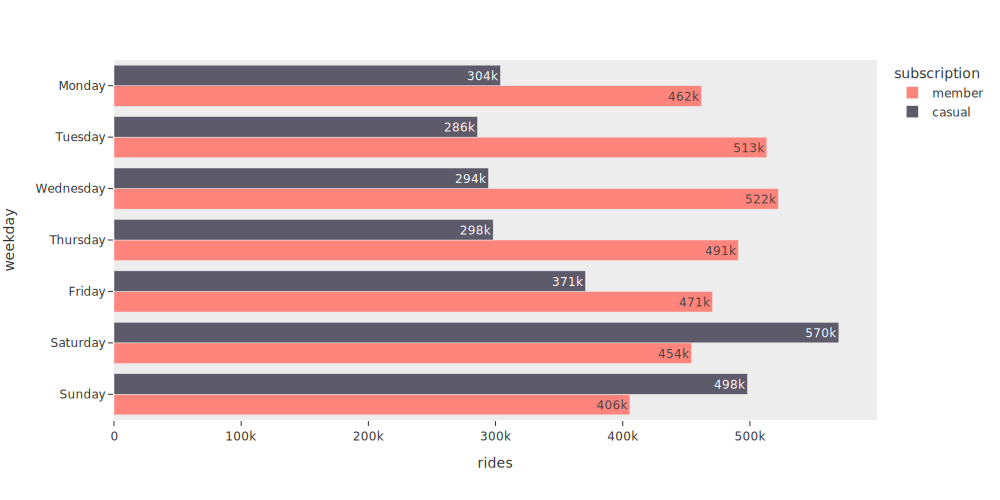

In [80]:
# Presenting Rides per Weekday for each subscription type
hor_bar_chart = px.bar(sub_day_grp,
               x="rides",
               y="weekday",
               barmode='group',
               color = "subscription",
               color_discrete_map= {"casual":"#5D5B6A", "member":"#FF847B"},
               text = "rides",
               template = "ggplot2",
               width= 1000,
               category_orders=cat_order )
hor_bar_chart.update_traces(texttemplate = "%{text:.3s}", width = 0.4)
hor_bar_chart.update_xaxes(showgrid=False,zeroline=False)
hor_bar_chart.update_yaxes(showgrid=False,zeroline=False)
hor_bar_chart.show("svg")

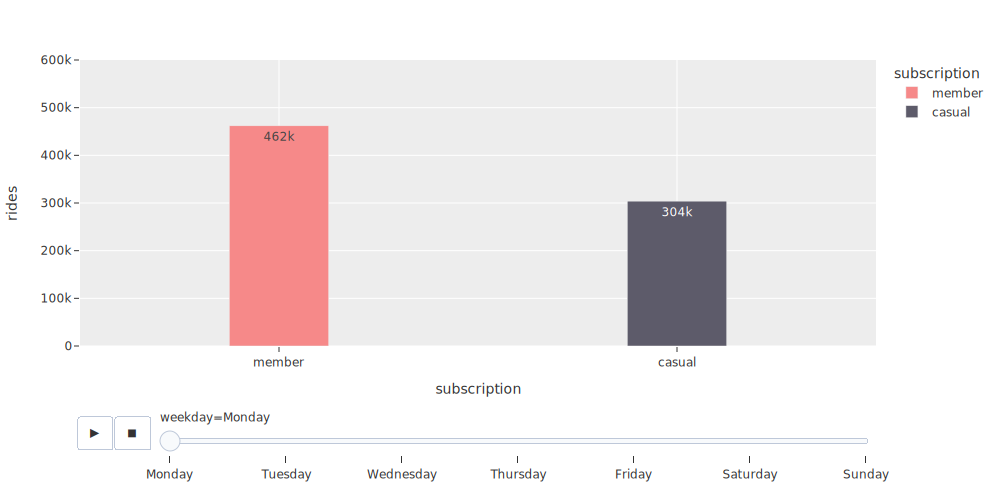

In [82]:
# Presenting Rides per Weekday for each subscription Using animated Bar graphs 
# It was cool to see my first animation graph,eventhough it won't be used in final analysis :D

bar_chart = px.bar(sub_day_grp,
               x="subscription",
               y="rides",
               # barmode='group',
               color = "subscription",
               color_discrete_map= {"casual":"#5D5B6A", "member":"#F68989"},
               text = "rides",
               template = "ggplot2",
               animation_frame = "weekday",
               range_y= [0,600000],
               width= 1000,
               category_orders=cat_order )

bar_chart.update_traces(texttemplate = "%{text:.3s}", width = 0.250)
bar_chart.layout.updatemenus[0].buttons[0].args[1]["frame"]["duration"] = 1500
bar_chart.layout.updatemenus[0].buttons[0].args[1]["transition"]["duration"] = 700
bar_chart.show("svg")


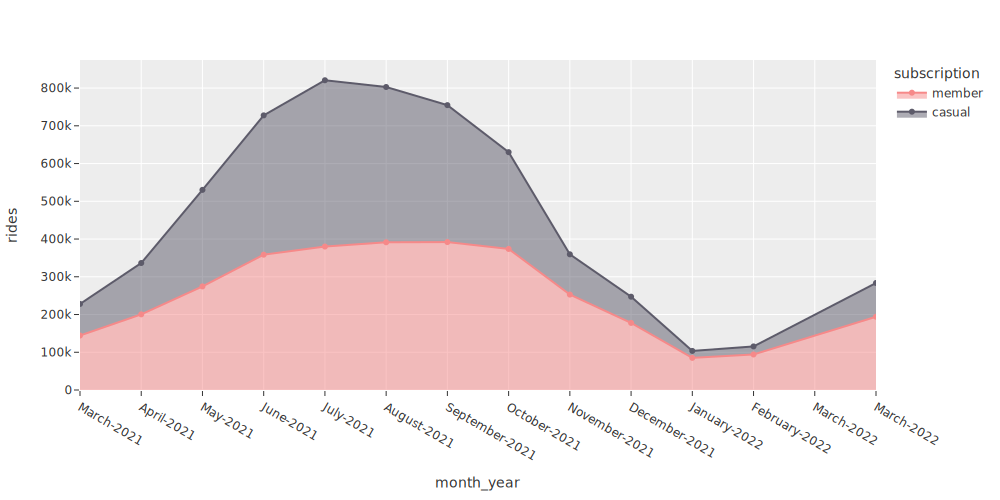

In [79]:
# Visualizing number of rides in each month, by subscription typ
area_chart = px.area(sub_month_grp,
               x="month_year",
               y="rides",
               color = "subscription",
               color_discrete_map= {"casual":"#5D5B6A", "member":"#F68989"},
               template = "ggplot2",
               markers=True,
               width= 1000,
               category_orders=cat_order )
area_chart.show("svg")

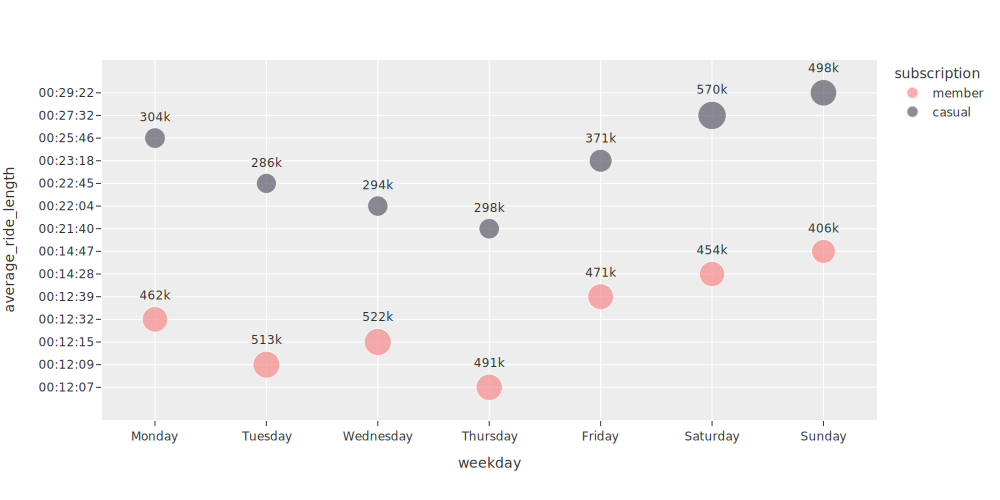

In [78]:
# This grapgh shows the following : 1) average ride length 2)Number of rides (size of the scatter plot) 
# Per weekday for each subscription type

scatter_chart = px.scatter(sub_day_grp,
               x="weekday",
               y="average_ride_length",
               color = "subscription",
               color_discrete_map= {"casual":"#5D5B6A", "member":"#F68989"},
               template = "ggplot2",
               size = 'rides',
               text="rides",
               width= 1000,
               category_orders=cat_order )
scatter_chart.update_traces(texttemplate = "%{text:.3s}", textposition = "top center")
scatter_chart.show("svg")

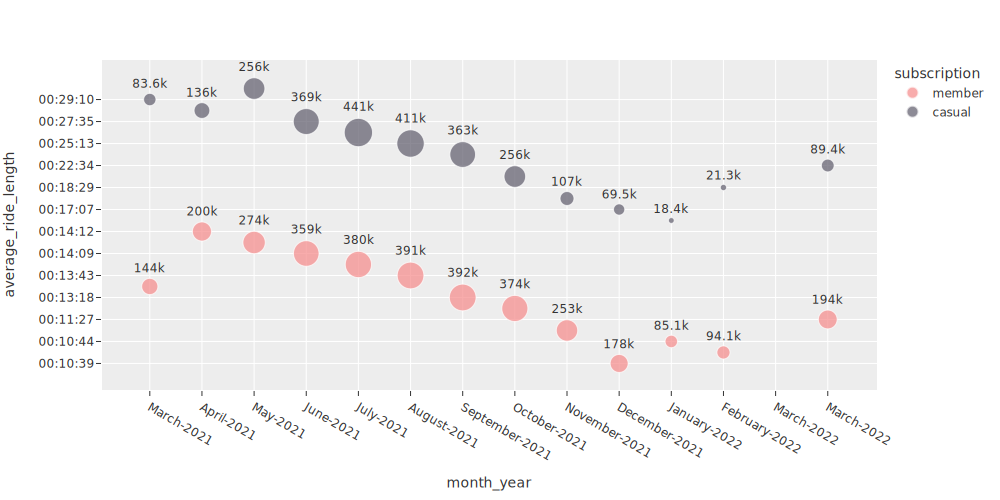

In [77]:
# Same as the previous chart, but showing the data for each month
scatter_month_chart = px.scatter(sub_month_grp,
               x="month_year",
               y="average_ride_length",
               color = "subscription",
               color_discrete_map= {"casual":"#5D5B6A", "member":"#F68989"},
               template = "ggplot2",
               size = 'rides',
               text="rides",
               width= 1000,
               category_orders=cat_order )
scatter_month_chart.update_traces(texttemplate = "%{text:.3s}", textposition = "top center")
scatter_month_chart.show("svg")

In [59]:
sub_station_grp.head()

,subscription,station,rides
0,member,Confidential,846041
1,casual,Confidential,721136
2,casual,Streeter Dr & Grand Ave,139675
3,casual,Millennium Park,70229
4,casual,Michigan Ave & Oak St,62426


In [60]:
# Creating another variable for the "sub_station_grp", only to include staions of Casual types
# (To be able to present top stations of each subscription type easier)

casual_station_grp = sub_station_grp[~sub_station_grp["subscription"].str.contains("member")]
# Removing the "Confidential" rows
casual_station_grp = casual_station_grp[~casual_station_grp["station"].str.contains("Confidential")]
casual_station_grp = casual_station_grp.head(10)

In [61]:
member_station_grp = sub_station_grp[~sub_station_grp["subscription"].str.contains("casual")]
member_station_grp = member_station_grp[~member_station_grp["station"].str.contains("Confidential")]
member_station_grp = member_station_grp.head(10)

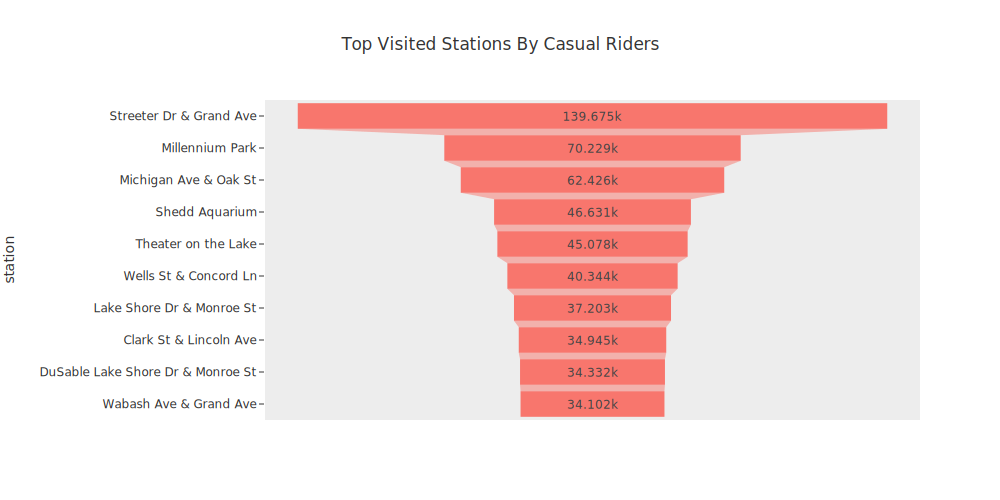

In [76]:
# Showing the top stations visited by Casual riders

funnel = px.funnel(casual_station_grp,
                    x="rides", 
                    y="station",
                    template = "ggplot2",
                    width= 1000,
                    title= "Top Visited Stations By Casual Riders")
funnel.update_xaxes(showgrid=False,zeroline=False)
funnel.update_yaxes(showgrid=False,zeroline=False)
funnel.show("svg")

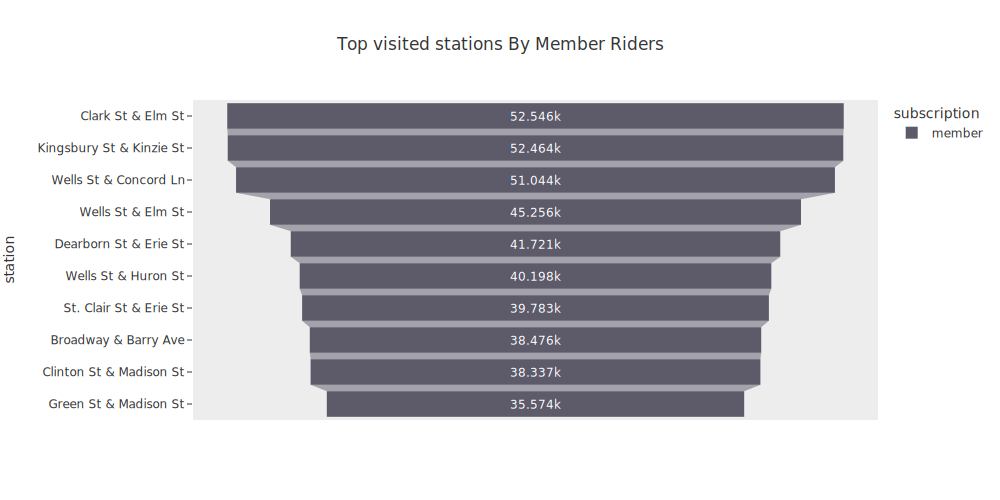

In [75]:
# Showing the top stations visited by Members 

funnel2 = px.funnel(member_station_grp,
                    x="rides", 
                    y="station",
                    color="subscription",
                    color_discrete_map= {"member":"#5D5B6A"},
                    template = "ggplot2",
                    width= 1000,
                    title= "Top visited stations By Member Riders")

funnel2.update_xaxes(showgrid=False,zeroline=False)
funnel2.update_yaxes(showgrid=False,zeroline=False)
funnel2.show("svg")
# funnel2.write_image("figure.png", engine="kaleido")